# <span style="color:Green">Decision Tree classifier on Iris dataset</span>

* **<font color=red>Importing some library</font>**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets as datasets
%matplotlib inline

* **<font color=red> I import here Iris Dataset and checking head of data </font>**

In [2]:
data = pd.read_csv('V:\\Study Material\\Data\\Iris\\iris.csv')
data.head()

,Sepal Length(cm),Sepal width(cm),Petal length(cm),Petal width(cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


* **<font color=red>I used label encoder for encoding class </font>**

In [3]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

In [4]:
print(data.shape)
data.head()

(150, 5)


,Sepal Length(cm),Sepal width(cm),Petal length(cm),Petal width(cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
data.columns

Index(['Sepal Length(cm)', 'Sepal width(cm)', 'Petal length(cm)',
       'Petal width(cm)', 'Class'],
      dtype='object')

* **<font color=red> Checking column counts for understanding data is equal </font>**

In [6]:
data["Class"].value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

* **<font color=red> I check here any missing values in dataset </font>**

In [7]:
data.isnull().sum()

Sepal Length(cm)    0
Sepal width(cm)     0
Petal length(cm)    0
Petal width(cm)     0
Class               0
dtype: int64

## **<font color=green> Data Visualization </font>** 

* **<font color=red> I used scatter plot for observe relationships between Sepal Length and Sepal width</font>**

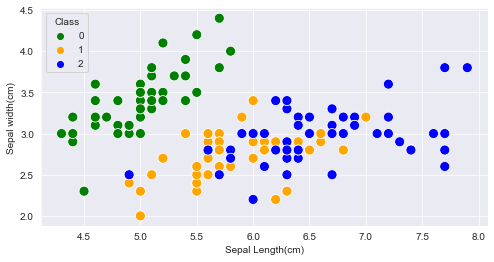

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.scatterplot(x='Sepal Length(cm)',y='Sepal width(cm)',hue='Class',data=data,palette=["green","orange","blue"],s=100)
plt.show()

* **<font color=red>I used scatter plot for observe relationships between Petal Length and Petal width</font>**

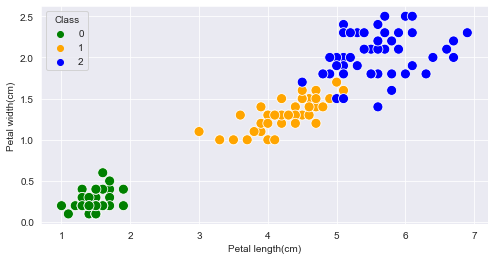

In [9]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,4))
sns.scatterplot(x='Petal length(cm)',y='Petal width(cm)',hue='Class',data=data,palette=["green","orange","blue"],s=100)
plt.show()

* **<font color=red>Here i used pair plot to see distribution of every single variables and relationships between two variables </font>**

<Figure size 1080x1080 with 0 Axes>

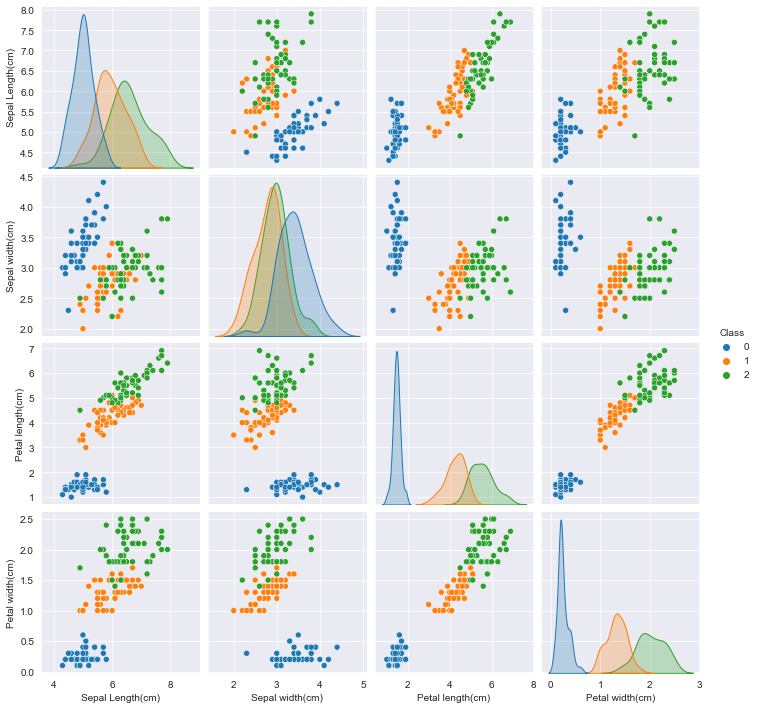

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(15,15))
sns.pairplot(data=data,hue='Class',palette='tab10')
plt.show()
plt.savefig('fig.jpeg')

* **<font color=red>Here i used distplot to see parametric distribution of a data and skewness </font>**

In [11]:
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [12]:
data.columns

Index(['Sepal Length(cm)', 'Sepal width(cm)', 'Petal length(cm)',
       'Petal width(cm)', 'Class'],
      dtype='object')

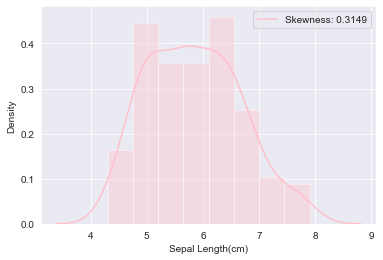

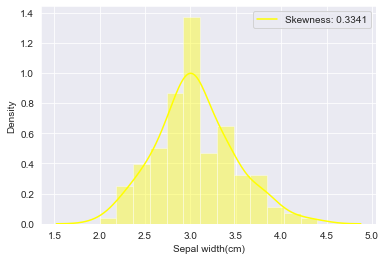

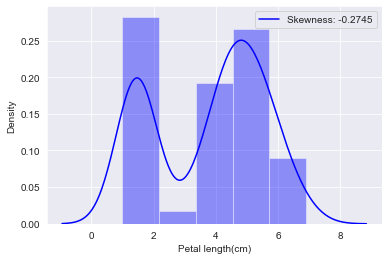

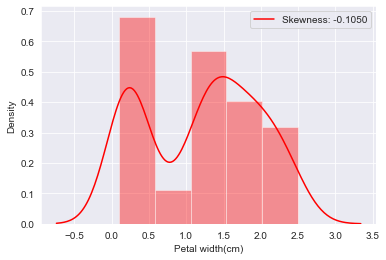

In [13]:
fig = sns.distplot(data['Sepal Length(cm)'],color='pink')
fig.legend(["Skewness: {:.4f}".format(data['Sepal Length(cm)'].skew())])
plt.show()
fig = sns.distplot(data['Sepal width(cm)'],color='yellow')
fig.legend(["Skewness: {:.4f}".format(data['Sepal width(cm)'].skew())])
plt.show()
fig = sns.distplot(data['Petal length(cm)'],color='blue')
fig.legend(["Skewness: {:.4f}".format(data['Petal length(cm)'].skew())])
plt.show()
fig = sns.distplot(data['Petal width(cm)'],color='red')
fig.legend(["Skewness: {:.4f}".format(data['Petal width(cm)'].skew())])
plt.show()

* **<font color=red>Here i used Histogram to see distribution of every single variable </font>**

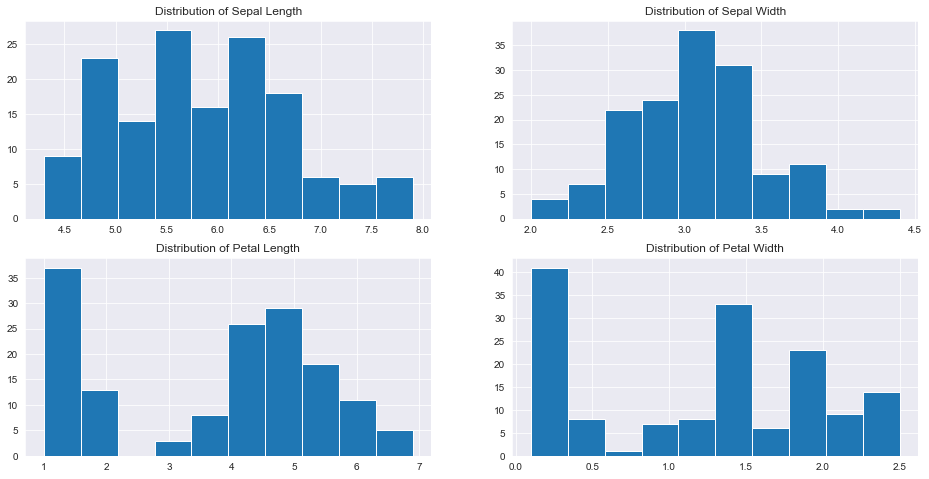

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(data["Sepal Length(cm)"]);
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(data["Sepal width(cm)"]);
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(data["Petal length(cm)"]);
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(data["Petal width(cm)"]);

* **<font color=red>Understanding Correlation between Variables</font>**

In [15]:
data.corr()

,Sepal Length(cm),Sepal width(cm),Petal length(cm),Petal width(cm),Class
Sepal Length(cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal width(cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length(cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width(cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


* **<font color=red>Heatmap for visualizing correlation </font>**

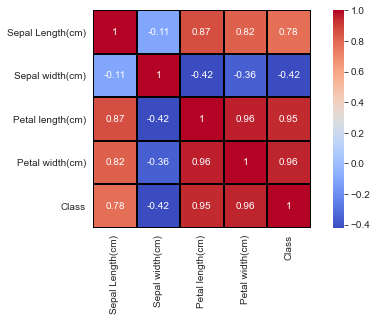

In [16]:
plt.figure(figsize=(8,4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm',linewidths=1,linecolor='black',square=True);

### **<font color=Green>Splitting Data into Training and Testing purpose </font>** 

In [17]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3)

In [18]:
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [19]:
data.columns

Index(['Sepal Length(cm)', 'Sepal width(cm)', 'Petal length(cm)',
       'Petal width(cm)', 'Class'],
      dtype='object')

In [20]:
train_x = train[['Sepal Length(cm)', 'Sepal width(cm)', 'Petal length(cm)','Petal width(cm)']]
train_y = train.Class
test_x = test[['Sepal Length(cm)', 'Sepal width(cm)', 'Petal length(cm)','Petal width(cm)']]
test_y = test.Class

### **<font color=Green>Building the model </font>** 

* **<font color=red>I used Decision Tree classifier Model for correctly classify Class </font>**

* **<font color=red>Here model gives us 93% accuracy of Decision </font>**

In [21]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)
predictions = dtree.predict(test_x)
print("The accuracy of Decision Tree is:",accuracy_score(predictions, test_y))

The accuracy of Decision Tree is: 0.9333333333333333


* **<font color=red>visualize the Decision Tree for better understanding </font>** 

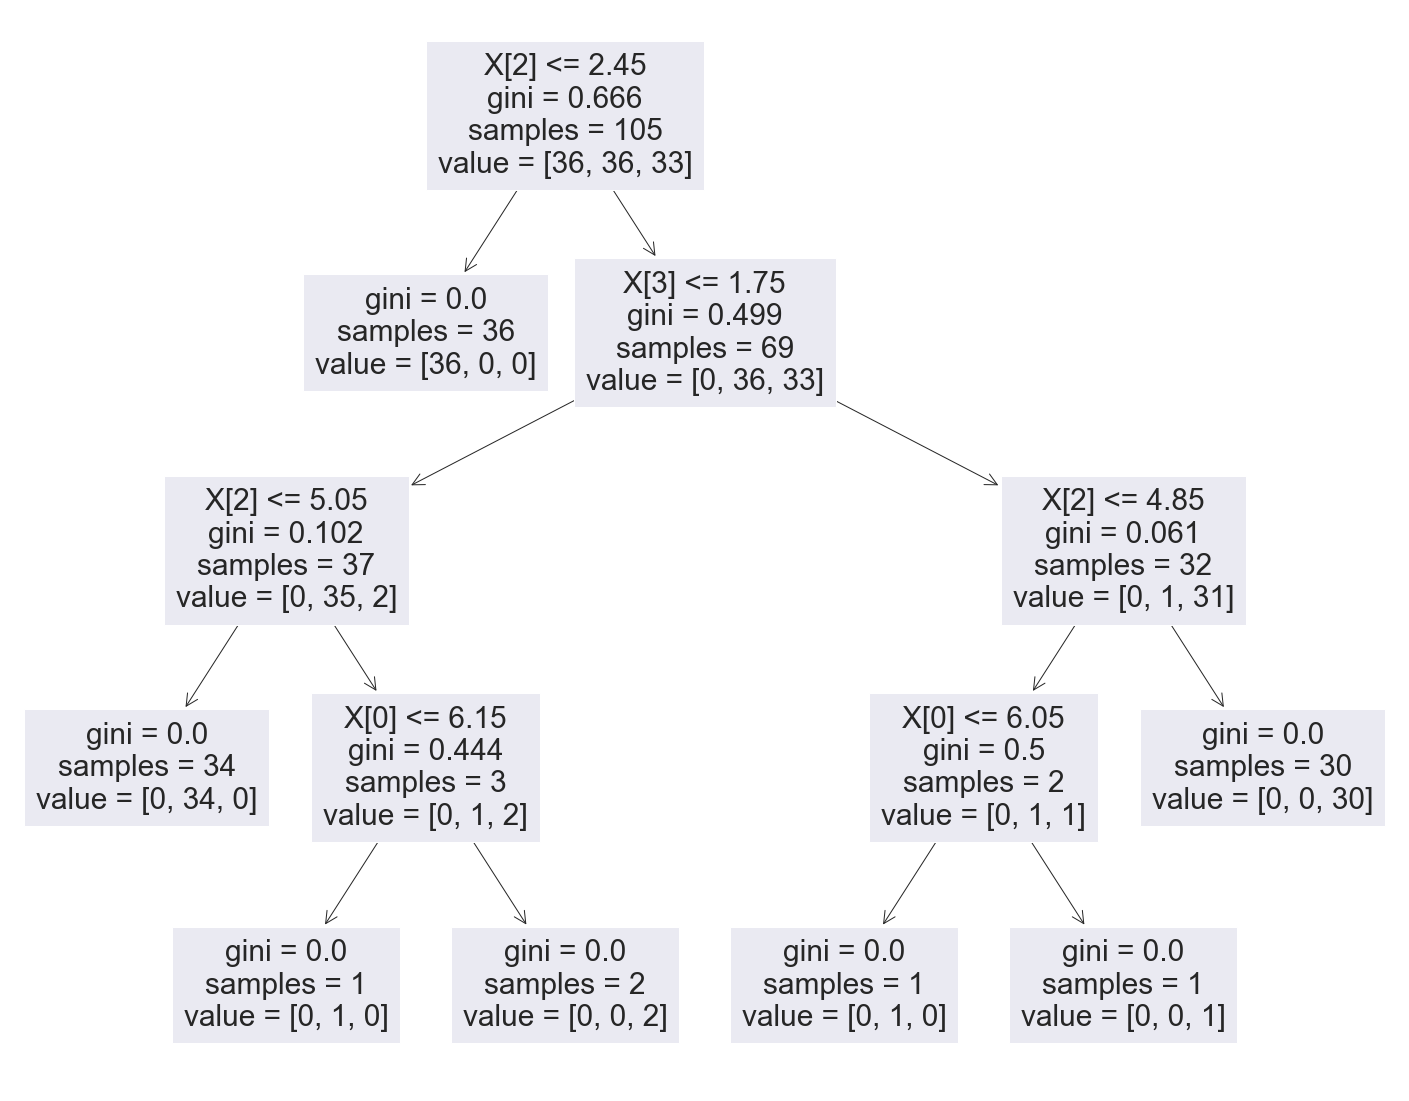

In [22]:
from sklearn import tree
X, y = train_x, train_y
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
plt.figure(figsize=(25,20))
tree.plot_tree(clf)
plt.show()